In [30]:
%matplotlib inline
import geopandas
from geopandas.tools import sjoin
from shapely.geometry import Point
import pandas as pd
import numpy as np
from geopy.geocoders import Nominatim

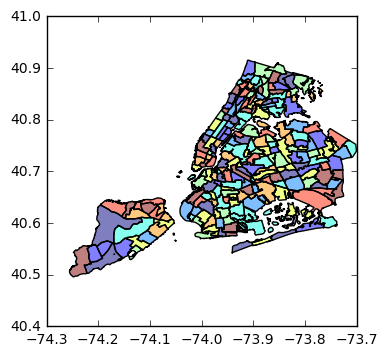

In [31]:
ny_data = geopandas.GeoDataFrame.from_file('data/nynta_17a/nynta.shp')
ny_data = ny_data.to_crs({'init': 'epsg:4326'})
ny_data.plot()

In [32]:
train = pd.read_json('data/train.json')
test = pd.read_json('data/test.json')

ntrain = train.shape[0]
train_test = pd.concat((train, test), axis=0).reset_index(drop=True)
    
train_test['geometry'] = train_test.apply(lambda x: Point((float(x.longitude), float(x.latitude))), axis=1)
train_test = train_test['geometry']
data = geopandas.GeoDataFrame(train_test, crs={"init": "epsg:4326"}, geometry='geometry')

joined = sjoin(data, ny_data, how="left", op='within')
relevant_cols = joined[['BoroCode', 'NTACode']]

In [33]:
boro_codes, labels = pd.factorize(relevant_cols['BoroCode'].values, sort=True)
nta_codes, labels = pd.factorize(relevant_cols['NTACode'].values, sort=True)

In [34]:
train['BoroCode'] = boro_codes[:ntrain]
train['NTACode'] = nta_codes[:ntrain]
test['BoroCode'] = boro_codes[ntrain:]
test['NTACode'] = nta_codes[ntrain:]

In [36]:
train.to_json('data/train.json', orient='records')
test.to_json('data/test.json', orient='records')

In [38]:
test

,Day,Month,Wday,Yday,Zero_building_id,Zero_manager_id,address1,avenue,bathrooms,bc_price,...,sparse_washerinunit,sparse_wheelchairaccess,sparse_wheelchairramp,sparse_wifi,sparse_wifiaccess,sparse_work,street,west,BoroCode,NTACode
0,11,6,5,163,0,0,11064,0,1.0,3.798790,...,0,0,0,0,0,0,1,0,0,103
1,24,6,4,176,1,0,11158,0,1.0,3.792656,...,0,0,0,0,0,0,1,0,0,99
2,6,4,2,97,0,0,6137,1,1.0,3.880657,...,0,0,0,0,0,0,0,0,0,99
3,6,4,2,97,0,0,10701,1,1.0,3.753477,...,0,0,0,0,0,0,0,0,2,16
4,8,4,4,99,1,0,1860,0,1.0,3.786255,...,0,0,0,0,0,0,1,0,0,110
5,29,6,2,181,0,0,9136,0,1.0,3.726941,...,0,0,0,0,0,0,1,0,0,110
6,6,4,2,97,0,0,1074,0,1.0,3.731219,...,0,0,0,0,0,0,0,0,2,38
7,27,4,2,118,0,0,12214,0,1.0,3.833324,...,0,0,0,0,0,0,1,1,0,93
8,17,4,6,108,0,0,4636,1,1.0,3.669724,...,0,0,0,0,0,0,0,0,3,130
9,7,4,3,98,0,0,8930,0,1.0,3.745124,...,0,0,0,0,0,0,1,0,0,104
